<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/B_practices/keras_example02_%E5%81%9A%E4%B8%AA%E7%AE%80%E5%8D%95%E7%9A%84%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E8%AE%AD%E7%BB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#ly:2022-10-29
#做个简单的非线性回归
#From: B站，人工智能前沿技术-2.3
# 模型导入：一般都会导入这几个层
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

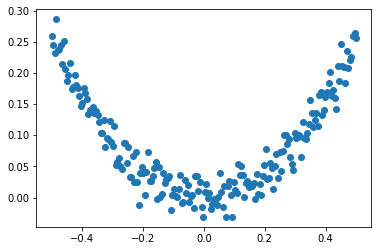

In [3]:
#生成200个随机点
x_data = np.linspace(-0.5, 0.5, 200)
noice = np.random.normal(0, 0.02,x_data.shape)
y_data = np.square(x_data) + noice #开平方，这样就是非线性的

#显示随机点
plt.scatter(x_data, y_data)
plt.show()

### 明显这个是非线性的，那么用上节课的线性肯定是不能拟合的
我们先尝试来拟合一下

loss: [0.24849967658519745, 0.0]
loss: [0.049803610891103745, 0.0]
loss: [0.014286155812442303, 0.0]
loss: [0.007698564324527979, 0.0]
loss: [0.006476729642599821, 0.0]
loss: [0.006250110920518637, 0.0]
loss: [0.006208077538758516, 0.0]
w: [[-0.0157801]] b: [0.08486237]
7/7 [==============================] - 0s 2ms/step


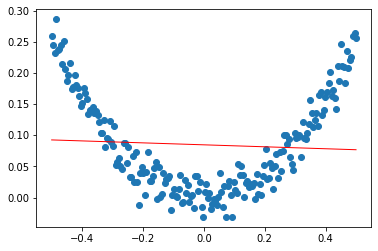

In [8]:
model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse', metrics=["accuracy"])

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现损失(loss)到达约0.006后，基本就没怎么变化了，而且拟合也是不好的  
我们接下来添加非线性拟合

loss: 0.018464967608451843
loss: 0.006209006533026695
loss: 0.006198529154062271
loss: 0.006198507733643055
loss: 0.006198507733643055
loss: 0.00619850680232048
loss: 0.006198507733643055
w: [[-0.25711024  0.31246614 -0.3335371  -0.4095264   0.05514618  0.14589436
   0.6156569  -0.20649225  0.7678143  -0.52449805]] b: [-0.00367964 -0.00664275 -0.01160292 -0.01492986  0.01763899 -0.00498611
 -0.00173168  0.00848799 -0.01884655 -0.02126842]
7/7 [==============================] - 0s 2ms/step


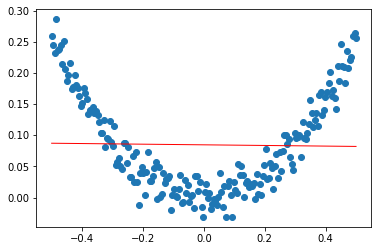

In [7]:
model = Sequential()
# model.add(Dense(units=1, input_dim=1)) #这只有一个输入单元（神经元），一个输出单元（神经元），太简单了，就不能拟合复杂的，因此我们需要多加一些神经元和隐藏层
#输入1，中间层（隐藏层）10
model.add(Dense(units=10, input_dim=1)) #这同时意味着这里的输出也会是10
#输出层1
model.add(Dense(units=1)) #等同于model.add(Dense(units=1, input_dim=10))这个input_dim=10其实就是自动承接的上一层的输出

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现仍然是线性拟合的，这是为什么呢？？这是因为没有添加`激活函数activate`，如果不设置，就会默认是线性拟合【激活函数不同，影响还挺大的】。下面我们把激活函数加上看看

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


loss: [0.21305504441261292, 0.0]
loss: [0.005044049117714167, 0.0]
loss: [0.0022176725324243307, 0.0]
loss: [0.0006509023951366544, 0.0]
loss: [0.000795024330727756, 0.0]
loss: [0.0004438292235136032, 0.0]
loss: [0.00047141924733296037, 0.0]
w: [[-0.16101487 -1.7365186   0.7310713   0.5916087  -0.22793639 -0.25126493
   0.35016945 -0.50175136 -0.29711506 -0.20891894]] b: [ 0.15543556  0.75030345  0.18893574  0.02294287  0.1950174   0.17071821
 -0.03654741  0.15801652  0.10081138  0.12309874]
7/7 [==============================] - 0s 2ms/step


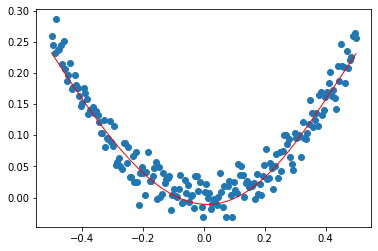

In [20]:
from keras.layers import Activation
from keras.optimizers import SGD
model = Sequential()
# model.add(Dense(units=1, input_dim=1)) #这只有一个输入单元（神经元），一个输出单元（神经元），太简单了，就不能拟合复杂的，因此我们需要多加一些神经元和隐藏层
#输入1，中间层（隐藏层）10
model.add(Dense(units=10, input_dim=1)) #这同时意味着这里的输出也会是10
model.add(Activation('tanh'))
#输出层1
model.add(Dense(units=1)) #等同于model.add(Dense(units=1, input_dim=10))这个input_dim=10其实就是自动承接的上一层的输出
model.add(Activation('tanh'))
#编译模型
sgd = SGD(lr=0.3)
model.compile(optimizer=sgd, loss='mse', metrics=["accuracy"])

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**在使用中发现，`激活函数`，`学习率`，对于拟合是有很大影响的。默认情况下，sgd的学习率`lr=0.01`，如果不调整，可以发现拟合也不会太好，设置为lr=0.3，就能拟合的不错